In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

____
## Basic Facts About The Data

We'll be looking at a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club. This version of the data set has more features than the set we looked at in the Decision Trees and Random Forests Project.

A table of the features (which is unedited from the course notebook) is shown below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

The information in the above table is stored in a CSV file:

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


We can define a function to conveniently retrieve the feature description:

In [4]:
#Unedited from course notebook
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

Example to test:

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


### Loading the data

In [6]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

This data set is much larger than any other one used in previous projects.

____
## Exploratory Data Analysis

Our goal is to predict whether or not a borrower fully paid their loan, so let's get a sense of the breakdown:

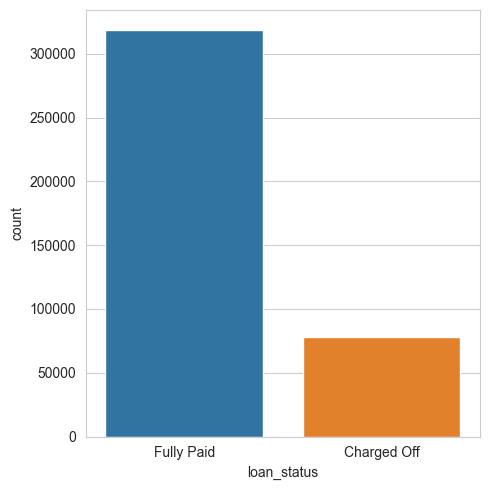

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='loan_status', hue='loan_status', legend=False)
plt.tight_layout()

Clearly this data is unbalanced, which might affect our results. Certainly, it will affect how we interpret the classification report at the end.

Let's look at the distribution of loan amounts, separated based on the payment status.

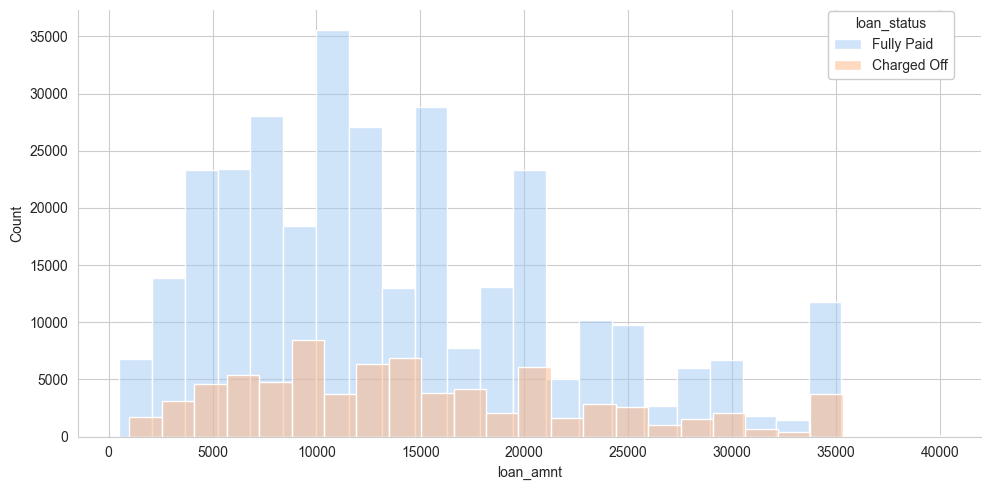

In [15]:
g = sns.FacetGrid(data=df, hue='loan_status', height=5,aspect=1.75, palette='pastel')
g.map_dataframe(sns.histplot, x='loan_amnt', alpha=0.5, bins=25)
g.add_legend(bbox_to_anchor=(.965, .9), frameon=True, framealpha=1)
plt.tight_layout()

Overall, the loans tend to be on the lower end in value, although there are some intervals with many more values than their surroundings. The distribution for unpaid loans has a much gentler, more diffuse profile than the paid off ones, which is more heavily clumped toward the lower end of the x-axis. This suggests that lower loan amounts are more likely to indicate successful payment, but not necessarily unsuccessful payment (there are probably other factors at play).

Next, let's look at the linear correlations between the variables through their Pearson correlation coefficients.

In [10]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**loan_amnt** and **installment** are almost a perfect correlation, which might mean there is redundant information in them. We'll explore this more later.

Visualizing the correlations with a heatmap:

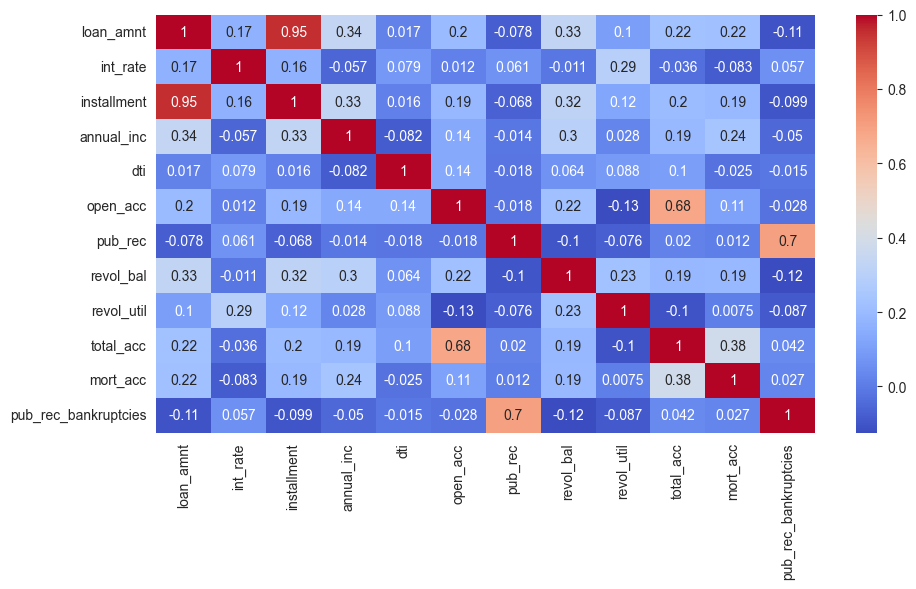

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', robust=True)
plt.tight_layout()

In addition the the **installment** $\longleftrightarrow$ **loan_amnt correlation**, we see that there's a strong correlation between **open_acc** $\longleftrightarrow$ **total_acc** and **pub_rec** $\longleftrightarrow$ **pub_rec_bankruptcies**. By inspection of the names, we can pretty much tell that these columns contain redundant information. Check their descriptions:

In [22]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


In [13]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [14]:
feat_info('pub_rec')

Number of derogatory public records


In [15]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


It makes sense why the two groups of would correlate pairwise: 
- the number **open_acc** must be related to **total_acc** because an open account is an account, and 
- **pub_rec_bankruptcies** must be related to **pub_rec** because a record of bankruptcy is a negative public record.

We should stay on the lookout for redundant data later.

Now let's investigate the correlation between **installment** and **loan_amnt**.

In [36]:
feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


Without specific knowledge of Lending Club's policies, we can safely say it makes sense for these two things to correlate positively: a lender is going to want a loan to be paid back in a reasonable amount of time, which necessitates the borrower paying back larger chunks of a larger loan at a time.

Visualizing the relationship:

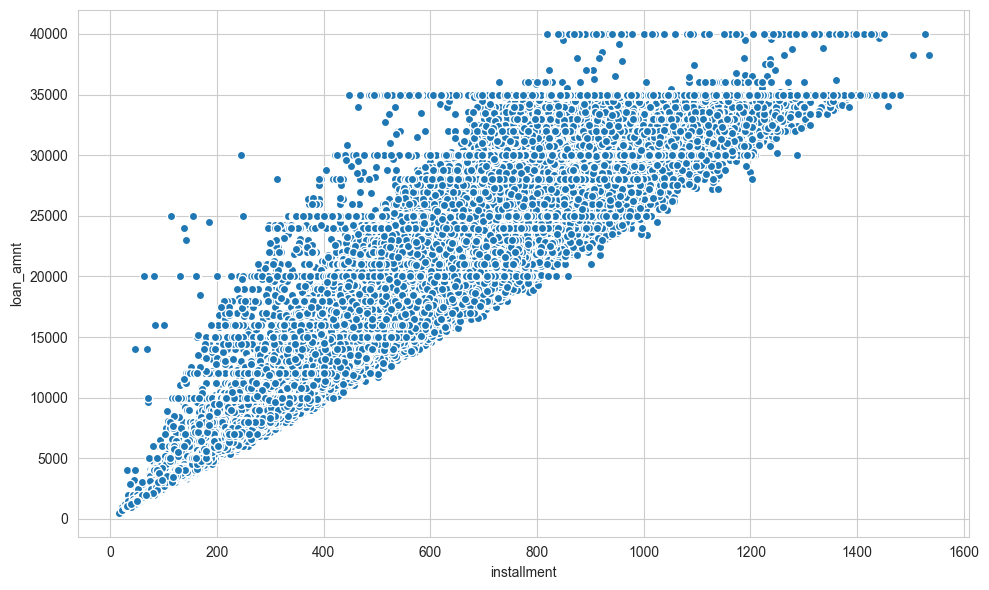

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['installment'], y=df['loan_amnt'], edgecolors='white')
plt.xlabel('installment')
plt.ylabel('loan_amnt')
plt.tight_layout()

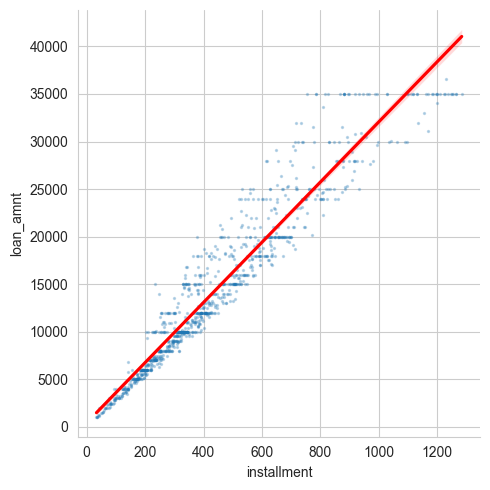

In [36]:
sns.lmplot(data=df.sample(1000), x='installment', y='loan_amnt', scatter_kws={'alpha':0.25, 's':2}, line_kws={'color':'r'})
plt.tight_layout()

The data points here basically all satisfy  
&nbsp;&nbsp;&nbsp;&nbsp;const. $\times$ **installment** $\leq$ **loan_amnt** $\leq$ const. $\times$ **installment**  
The two constants are likely determined by the other features of a borrower. We could do linear regression or use a different statistics package to determine the slop of this line and the $R^2$ value. 

Another way to visualize the comparison between the distribution of loan amounts based on the loan status is with a box plot:

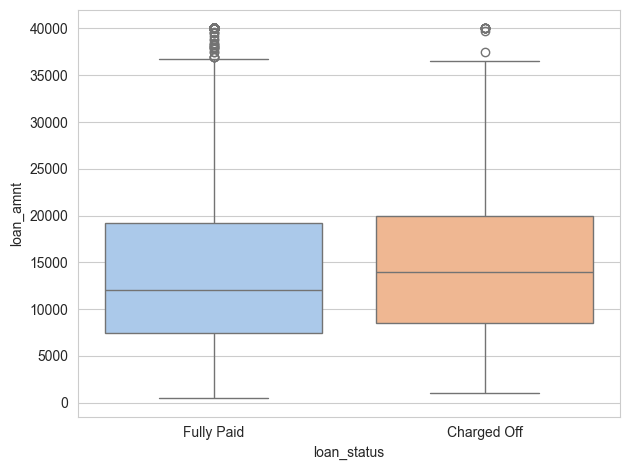

In [63]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt', hue='loan_status', legend=False, palette='pastel')
plt.tight_layout()

In [50]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The median fully paid loan is less than the median unpaid loan. There are more outliers in the fully paid group, but we know there are also many more fully paid loans than not. Otherwise, the 25-75 percentile boxes for the two overlap almost perfectly, with the unpaid load box shifted higher a little. This is to be expected, since it is harder to fully pay off a larger loan.

By looking through the data set's features, we two similar categorical variables, **grade** and **subgrade**. Their unique values are:

In [38]:
print('Grade: ', sorted(df['grade'].unique()))
print('\n')
print('Sub-grade: ', sorted(df['sub_grade'].unique()))

Grade:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']


Sub-grade:  ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


Let's see their distributions, starting with **grade**, broken down based on payment status.

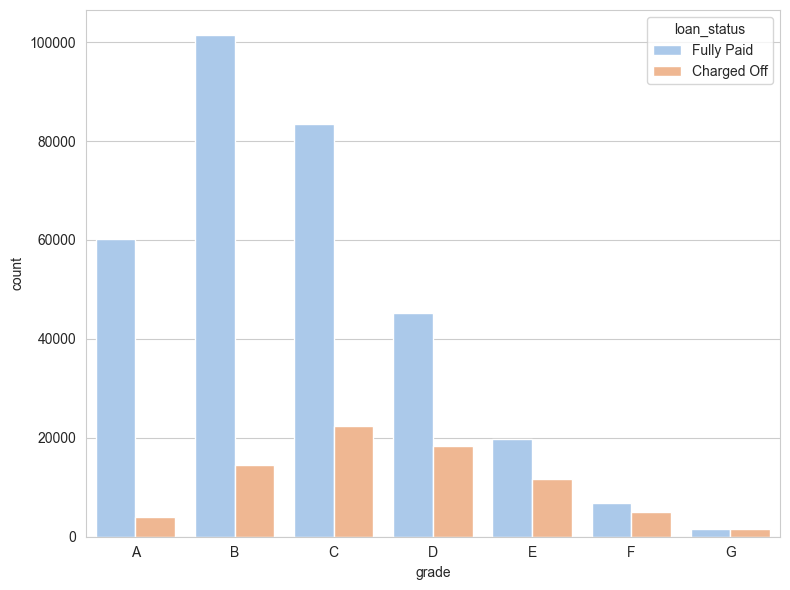

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='grade', hue='loan_status', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='pastel')
plt.tight_layout()

We can already tell that *F* and *G* grade loans have a higher ration of *unpaid*:*paid* than the other categories. Moreover, *B* is the most common grade.

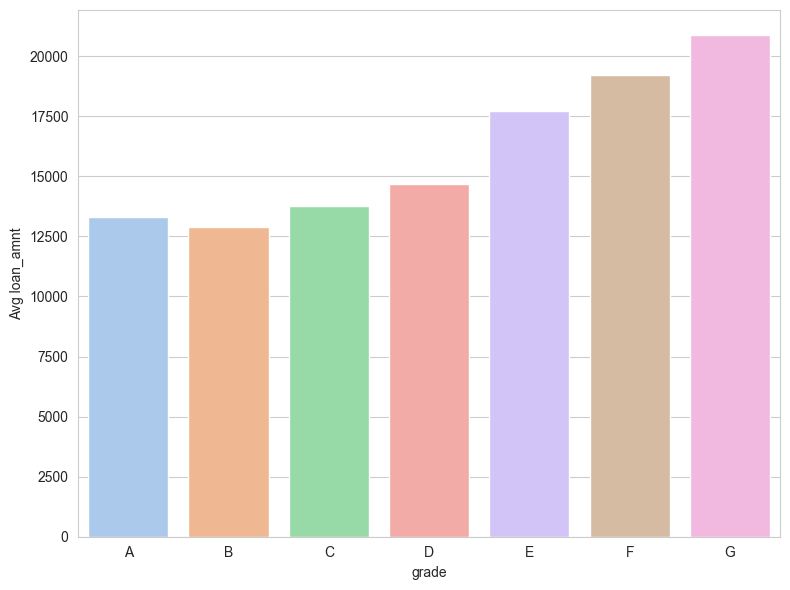

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby('grade').mean(numeric_only=True), x='grade', y='loan_amnt', hue='grade', palette='pastel')
plt.ylabel('Avg loan_amnt')
plt.tight_layout()

Apart from the small dip in average loan size going from *A* to *B*, the average loan amounts increase as the grade goes further into the alphabet. *B* having the smallest average loan size tracks with it being the grade for most loans. The discrepancy between the number of *C* loans and *A* loans (*C* has more) is a bit trickier to explain, and probably depends on more of the context of this data set.

Now let's investigate the **subgrade** column. First, here is its distribution:

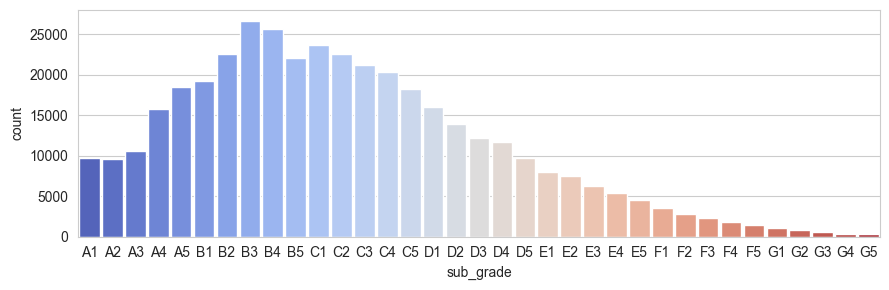

In [58]:
plt.figure(figsize=(9,3))
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()), hue='sub_grade', 
              hue_order=sorted(df['sub_grade'].unique()), palette='coolwarm', width=0.9)
plt.tight_layout()

We'll also look at how it breaks down based on payment status:

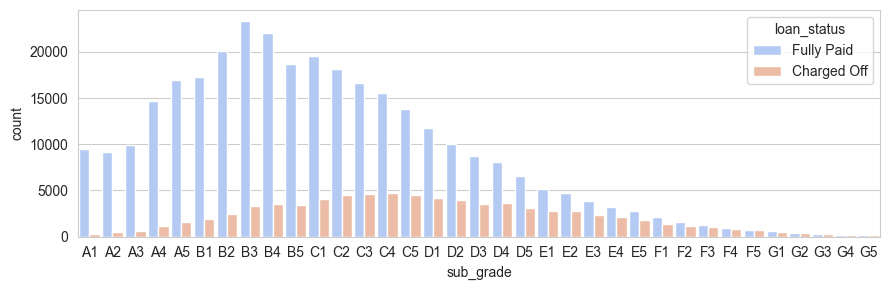

In [52]:
plt.figure(figsize=(9,3))
sns.countplot(data=df, x='sub_grade', order=sorted(df['sub_grade'].unique()), hue='loan_status', 
            palette='coolwarm', width=0.9)
plt.tight_layout()

The distribution of unpaid loans has a shift toward higher subgrade compared to the distribution of paid loans. The two distributions begin to heavily resemble one another around F1.

We noticed earlier that the *F*- and *G*- grade loans don't get paid back very often (relatively speaking). Let's zoom in on the tail of the **sub_grade** distribution.

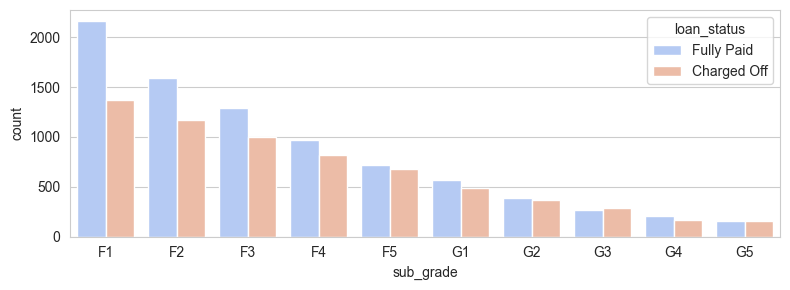

In [54]:
plt.figure(figsize=(8,3))
sns.countplot(data = df[(df['grade'] == 'F') | (df['grade'] == 'G')], 
              order=sorted(df[(df['grade'] == 'F') | (df['grade'] == 'G')]['sub_grade'].unique()),
              x='sub_grade', hue='loan_status', palette='coolwarm')
plt.tight_layout()

Let's also see how **sub_grade** relates to the average loan amount.

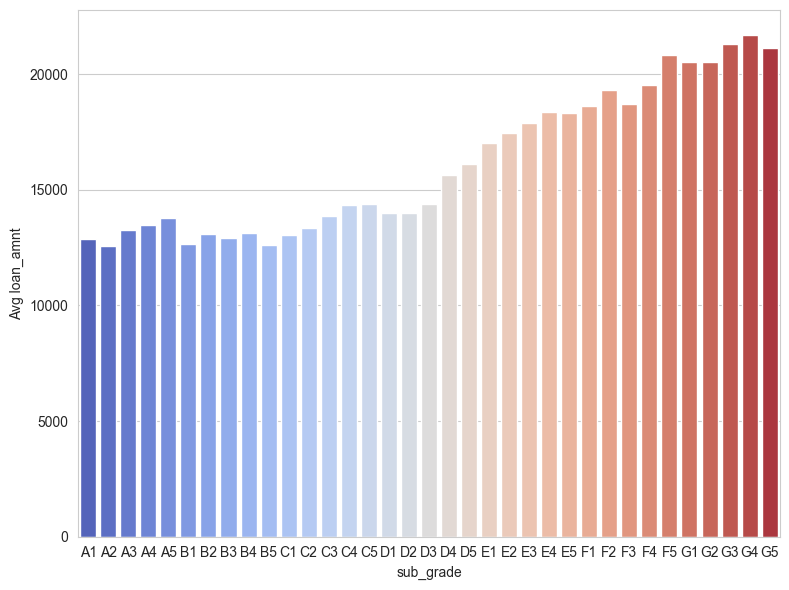

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby('sub_grade').mean(numeric_only=True), x='sub_grade', y='loan_amnt', hue='sub_grade', palette='coolwarm')
plt.ylabel('Avg loan_amnt')
plt.tight_layout()

We see the same general behavior when broken down by **sub_grade** as we did when broken down by **grade**, which is to be expected.

To conclude the exploratory analysis, let's get a feel for how the loan payment status correlates (linearly) with some of the numerical features. We need to convert the status to numerical 0/1 values first:

In [64]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

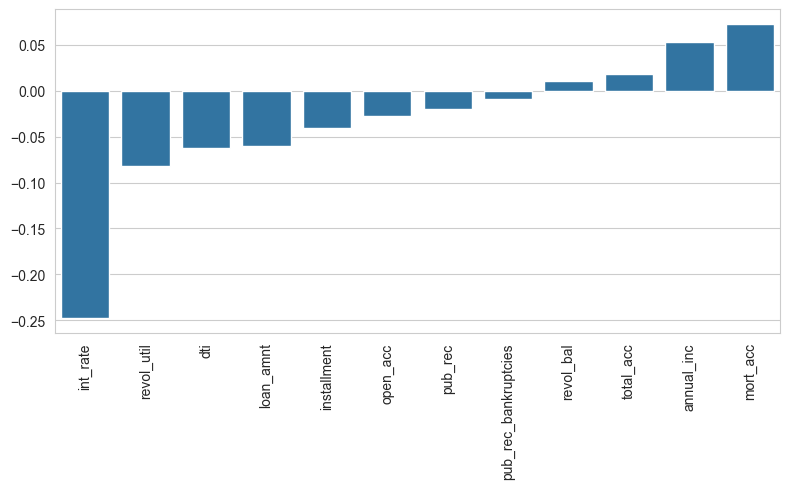

In [74]:
plt.figure(figsize=(8,5))
sns.barplot(data=df.corrwith(df['loan_repaid'], numeric_only=True).sort_values()[:-1])
plt.xticks(rotation=90)
plt.tight_layout()

Nothing correlates linearly very much with the loan status. We can see that the interest rate is negatively correlated with repayment, which makes sense.

____
## Data PreProcessing
Looking at the *df.info()* call earlier, we can see that some the columns are missing data. We'll need to clean up the data set before we can do any training.

The length of the dataframe is:

In [63]:
len(df)

396030

In order to make our job easier, let's isolate the columns with missing values and count how many there are.

In [69]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

The number of missing values can be misleading since the data set is so big. To make it easier to understand, let's convert these numbers into percentages.

In [75]:
df.isnull().sum().apply(lambda x: 100*x/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

We'll start from the top. **emp_title** and **emp_length** are the first two columns with missing data. Based on their names, they might be a little redundant. Let's look at their desctiptions.

In [72]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


They are thematically linked but do contain different information. Depending on the number of unique values of each column, they might be useful.

In [73]:
df['emp_title'].nunique()

173105

**emp_title** has 173105 unique titles, but that doesn't mean the jobs are different, since this wouldn't take into account slight variation in terminology or even spelling differences.

In [78]:
df['emp_title'].nunique

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
396026                       Agent
396027                City Carrier
396028        Gracon Services, Inc
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [79]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

It looks like there are probably too many unique jobs (and titles) for the column to be useful, so we'll have to drop it.

In [76]:
df.drop('emp_title', axis=1, inplace=True)

Next, let's look at the **emp_length** column. It's unique values are:

In [116]:
sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2]))

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

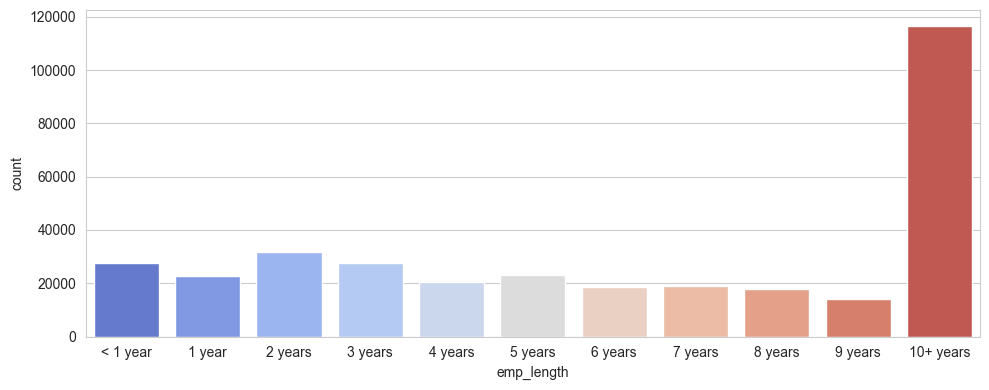

In [80]:
plt.figure(figsize=(10,4))
sns.countplot(data=df.dropna(), x='emp_length', 
              order=sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2])),
              hue='emp_length', hue_order=sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2])),
              palette='coolwarm'
              )
plt.tight_layout()

By far the most common employment length is 10+ years. Let's see how this plot breaks down based on payment status.

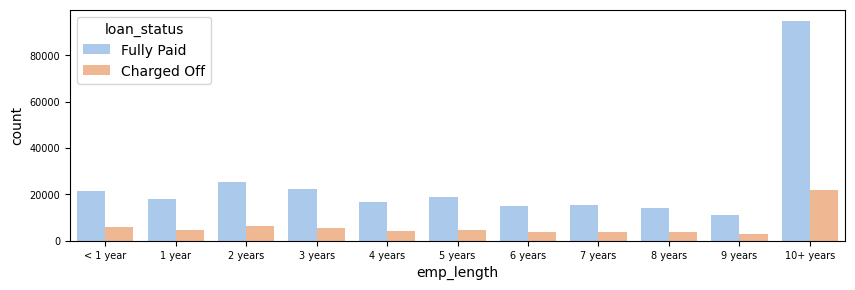

In [124]:
plt.figure(figsize=(10,3))
ax = sns.countplot(data=df.dropna(), x='emp_length', 
              order=sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2])),
              hue='loan_status', palette='pastel'
              )
ax.tick_params(labelsize=7)

This doesn't actually tell us much about a connection between employment lenght and payment status. Let's see how employment length compares to the average loan amount.

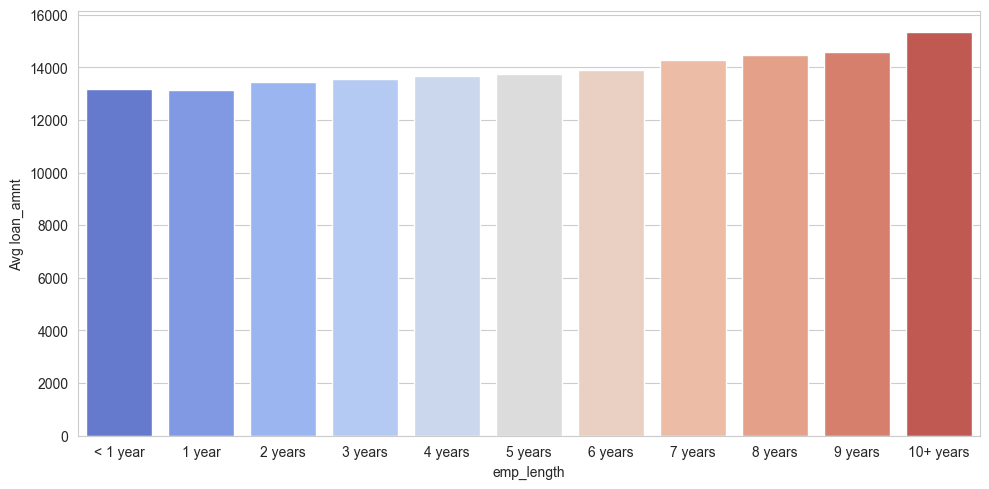

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('emp_length').mean(numeric_only=True), x='emp_length', y='loan_amnt',
            order=sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2])),
              hue='emp_length', hue_order=sorted(df['emp_length'].dropna().unique(), key=lambda x: 0 if list(x)[0]=='<' else int(x[0:2])),
              palette='coolwarm'
              )
plt.ylabel('Avg loan_amnt')
plt.tight_layout()

There is a positive correlation between employment length and average loan amount, although the slope looks pretty small.

In order to figure out once and for all whether employment length correlates with payment status, consider the percentage of unpaid loans for each employment length category.

In [88]:
emp_len_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_len_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len_co_percent = emp_len_co/(emp_len_co + emp_len_fp)

In [32]:
emp_len_co_percent

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

This is the actual percentage of each emp_length that is made up of unpaid loans (the solution computes the ratio). Nevertheless it conveys the same information as the ratio: There is almost no correlation between **emp_length** and whether or not the loan gets paid. Therefore **emp_length** is not a useful metric, so we can get rid of it. First visualizing:

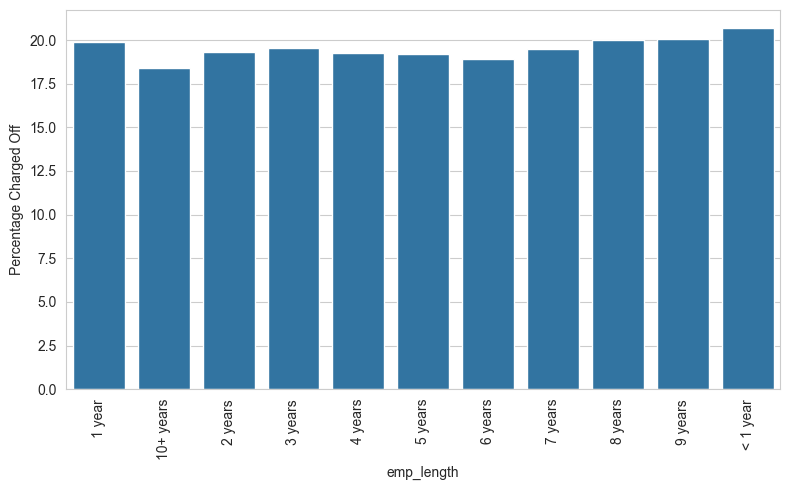

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(data = 100*emp_len_co_percent)
plt.xticks(rotation = 90)
plt.ylabel('Percentage Charged Off')
plt.tight_layout()

In [93]:
df.drop('emp_length', axis=1, inplace=True)

Let's continue dealing with missing data. Now that we've argued for getting rid of the first two columns with missing rows, let's see an updated list:

In [94]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Let's see the desctiption of the **title** column:

In [95]:
feat_info('title')

The loan title provided by the borrower


This seems like it might be an awful lot like the **purpose** column:

In [96]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


Let's investigate this further. Some of the **purpose** column entries are:

In [43]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

Whereas, some of the **title** entries are:

In [44]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Clearly these two columns convey the same information, and yet **title** is somehow missing data. We can safely get rid of it.

In [97]:
df.drop('title', axis=1, inplace=True)

An updated list of missing data:

In [98]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

The **mort_acc** column has by far the most remaining missing information, so let's look at what that feature is exactly:

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


How many unique values of **mort_acc** are there?

In [99]:
df['mort_acc'].nunique()

33

Let's see how the values break down:

In [100]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

There's too many missing values to just get rid of those rows altogether, so we need make an effort to fill them in. There are many ways to do this, but our best course of action is to look at which features correlate the strongest with **mort_acc**.

In [101]:
print('Correlation with the mort_acc column')
df.corrwith(df['mort_acc'], numeric_only=True).sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
dtype: float64

We already observed that **total_acc** contained similar information to **mort_acc**, so it makes sense that they would have the highest linear correlation. We can fill in missing **mort_acc** values based on the average value of **mort_acc** for the corresponding value of **total_acc**. The table of values looks like:

In [57]:
df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Applying the procedure to the whole column:

In [102]:
mort_acc_means = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
df['mort_acc'] = df[['mort_acc', 'total_acc']].apply(lambda x: mort_acc_means.loc[x['total_acc']] if pd.isna(x['mort_acc']) 
                                                     else x['mort_acc'], axis=1)

Checking that we filled in the missing values:

In [103]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Now let's look at the two remaining columns with missing values. Their descriptions are:

In [104]:
feat_info('revol_util')
print('\n')
feat_info('pub_rec_bankruptcies')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of public record bankruptcies


These look like useful features, and since they are each only missing a very small percentage of the overall data, we can just drop the rows with empty values.

In [105]:
df.dropna(inplace=True)

Now a final check that we have dealt with missing data:

In [106]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

____
### Categorical Variables and Dummy Variables

We successfully dealth with missing data. Now, we need to convert the categorical features into forms that our upcoming neural network will be able to use.

The non-numerical columns are:

In [107]:
df.select_dtypes(exclude='number').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

The first one to look at is **term**. Its unique values are:

In [108]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

We can easily convert this to a numerical column by just selecting the number of months:

In [109]:
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

All of the information contained in the **grade** column is also contained (with more detail) in the **sub_grade** column, so we will get rid of the former.

In [111]:
df.drop('grade', axis=1, inplace=True)

Since the **sub_grade** column has many discrete values, it is a good candidate to turn into dummy variables. The row values of each new dummy column will be bool True/False.

In [112]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

The remaining non-numerical columns are:

In [34]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Let's look at the descriptions of some of these:

In [114]:
feat_info('verification_status')
print('\n')
feat_info('application_type')
print('\n')
feat_info('initial_list_status')
print('\n')
feat_info('purpose')

Indicates if income was verified by LC, not verified, or if the income source was verified


Indicates whether the loan is an individual application or a joint application with two co-borrowers


The initial listing status of the loan. Possible values are – W, F


A category provided by the borrower for the loan request. 


These are all categorical columns with small numbers of possible values. They are also perfect candidates to directly turn into dummy variables.

In [115]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
#apptype_dummies = pd.get_dummies(df['application_type'], drop_first=True)
#initlist_dummies = pd.get_dummies(df['initial_list_status'], drop_first=True)
#purpose_dummies = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

The remaining non-numerical columns are:

In [116]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

Let's look at **home_ownership**:

In [117]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [118]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

There are actually more possible values than the feature description lists. However, *NONE* and *ANY* can be lumped into the *OTHER* category, since they are all vague and yet different from the other three options. Let's see how this would impact the value counts:

In [42]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

There are relatively very few of the 'other' options, so we can safely replace as described above.

In [119]:
df['home_ownership'] = df['home_ownership'].replace({'NONE':'OTHER', 'ANY':'OTHER'})
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

Now convert the four values to dummy variables:

In [120]:
homeown_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, homeown_dummies], axis=1)

In [121]:
df.drop('home_ownership', axis=1, inplace=True)

The remaining non-numerical columns are:

In [122]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

Let's look at the **address** column. An exmample value is:

In [123]:
print(df['address'].loc[0])
#print(df['address'].loc[0][-5:])

0174 Michelle Gateway
Mendozaberg, OK 22690


There is probably way too much information in the full address. Nevertheless, it may be interesting/helpful to retain some geographical information about each borrower. One simple option is to only keep the zip code from each address:

In [124]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [125]:
df['zip_code'].nunique()

10

There are only 10 unique zip codes in the data set, which is a manageable number. We can convert them into dummy variables.

In [126]:
zipcode_dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop(['address', 'zip_code'], axis=1), zipcode_dummies], axis=1)

The remaining non-numerical columns are:

In [127]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

Look at the **issue_d** column:

In [128]:
feat_info('issue_d')

The month which the loan was funded


If we're trying to build a model to predict whether or not we should issue a loan based on the likelihood that it will be paid off, then including information about the loan being issued to each borrower in the data set could cause data leakage in the training process. So, we'll completely eliminate this feature.

In [129]:
df.drop('issue_d', axis = 1, inplace = True)

The final non-numerical feature is **earliest_cr_line**:

In [130]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


An example value is:

In [131]:
print(df['earliest_cr_line'].loc[0])

Jun-1990


We could probably separate these and look at how the month of each year influences the payment status, but it would probably be more helpful to take a coarser-grain approach and only look at the years. We'll be left with a numerical column and therefore don't need dummy variables.

In [132]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [133]:
df.drop('earliest_cr_line', axis=1, inplace=True)

The only non-numerical column left is the lable itself:

In [134]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

We're done feature engineering and dealing with missing data! Now we can move on to preparing the data for training, and then building and training a neural network.

____
## Preparing Data For Training

In [135]:
from sklearn.model_selection import train_test_split

We no longer need the **loan_status** column, because we created the **loan_repaid** column to contain the same information using 0/1.

In [136]:
df.drop('loan_status', axis=1, inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc          

In [138]:
#Retrieve values from the dataframe
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing the Data
We'll use the MinMaxScaler to transform the data while keeping its shape.

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:

scaler = MinMaxScaler()
#Train the scaler on the train data only to prevent data leakage
scaler.fit(X_train)

#Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

____
## Creating the Model

We finally get to build neural network using Keras. We'll start with a standard sequential dense network and include dropout to prevent overfitting.

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

To start, our network will have 3 hidden layers, and we'll reduce the number of neurons by about 50% each layer. The first hidden layer will have 78 neurons, corresponding to one neuron per input feature. We'll use the ReLU activation function for the hidden layers and sigmoid for the output since we're doing classification. There are two output categories, so the loss function will be binary cross entropy. The learning rate schedule and back-propagation scheme will be set with the Adam optimizer.

In [144]:
# Building the Keras neural network, called model

model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

____
## Training Model
We'll start with only 25 training epochs and a batch size of 256 samples. We're specifying validation data so that we can keep track of loss and validation loss during training.

In [145]:
model.fit(x = X_train,
    y = y_train,
    epochs = 25,
    batch_size=256,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3570 - val_loss: 0.2643
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.2665 - val_loss: 0.2628
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 0.2634 - val_loss: 0.2631
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.2624 - val_loss: 0.2627
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.2616 - val_loss: 0.2615
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 0.2599 - val_loss: 0.2621
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.2618 - val_loss: 0.2615
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.2601 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 0.2590 - val_loss: 0.2618
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.2598 - val_loss: 0.2615
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 0.2592 - val_loss: 0.2611
Epoch 12/2

We can save the model before we tinker with it during the evaluation phase.

In [155]:
model.save('ashton_model1.keras')

### Evaluating Model Performance
Let's visualize the training and validation loss.

In [146]:
model_loss = pd.DataFrame(model.history.history)

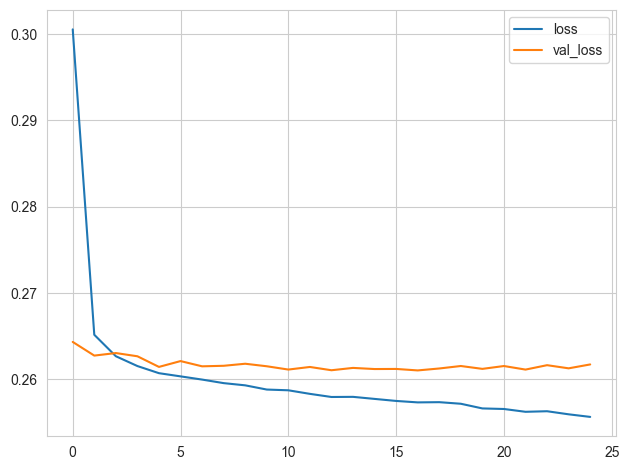

In [148]:
model_loss.plot()
plt.tight_layout()

While the loss could be lower, we can see there are no clear signs of overfitting, since the validation loss saturates pretty quickly. Next we'll use the standard classification metrics to evaluate performance.

In [149]:
raw_predictions = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step


We're going to start with the naive classification threshold 0.5. We can use a search to determine a better value if the model doesn't perform well engouh.

In [150]:
predictions = np.where(raw_predictions>0.5, 1, 0)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
print('Classification Report 1: \n', classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix 1: \n', confusion_matrix(y_test, predictions))

Classification Report 1: 
               precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confusion Matrix 1: 
 [[ 6783  8875]
 [   65 63321]]


The precision scores are pretty good for both categories, but the recall and f1-score for the 0 outcome are not great. Let's use Scikit-Learn to optimize the decision threshold based on several scoring metrics, starting with the f1-score of the 0 outcome.

In [158]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score

In [166]:
#take a sample of the test data to speed up process
rng = np.random.default_rng(seed=42)
ind = rng.choice(np.arange(len(X_test)), size=5000, replace=False)
X_opt = X_test[ind, :]
y_opt = y_test[ind]

In [241]:
def ThresholdOptimizer_f1(model, X: np.ndarray, y: np.ndarray, step: np.float64, pos_label, other_label_thresh) -> np.float64:
    '''
    Custom (simple) decision threshold optimization for Keras Sequential classification models. Performs a manual search through threshold values, keeping track of the f1-score for
    the outcome pos_label. Inputs are:
    
        - Keras model: model
        - X: feature data in np.ndarray form
        - y: labels in np.ndarray form
        - step: step size (threshold values lie between 0.0 and 1.0)
        - pos_label: output label to prioritize in optimization
        
    The output is the optimal threshold. To avoid a situation where the optimal threshold is equal to pos_label, we will need to also keep track of the f1-score of the other outcome.
    The optimal threshold will therefore be chosen so that the other outcome's f1-score does not go below other_label_thresh, if possible.
    
    Requires: sklearn.metrics.f1_score
    '''
    
    other_label = int(not pos_label)
    
    raw_preds = model.predict(X)
    
    pos_label_score_history = []
    other_label_score_history = []
    
    for thresh in np.arange(start=0.0, stop=1.0, step=step):
        preds = np.where(raw_preds>thresh, 1, 0)
        pos_label_score_history.append(
            f1_score(y, preds, labels=[pos_label], average='weighted')
        )
        other_label_score_history.append(
            f1_score(y, preds, labels=[other_label], average='weighted')
        )
        
    pos_label_score_history = np.array(pos_label_score_history)
    other_label_score_history = np.array(other_label_score_history)
    
    condition1 = abs(pos_label_score_history-other_label_score_history)<0.5
    condition2 = other_label_score_history >= other_label_thresh
    comb = [elt1 and elt2 for elt1, elt2 in list(zip(condition1, condition2))]
        
    ind = np.argwhere(comb)
    ind_output = np.argmax(pos_label_score_history[ind])
    return np.arange(start=0.0, stop=1.0, step=step)[ind_output], pos_label_score_history[ind_output], other_label_score_history[ind_output]

The optimized threshold based on our simple function is:

In [244]:
opt_thresh = ThresholdOptimizer_f1(model, X_opt, y_opt, 0.01, 0, 0.5)[0]
print(opt_thresh)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
0.67


Now let's check out the classification report and confusion matrix:

In [246]:
predictions_opt = np.where(raw_predictions>opt_thresh, 1, 0)
print('Classification Report 2: \n', classification_report(y_test, predictions_opt))
print('\n')
print('Confusion Matrix 2: \n', confusion_matrix(y_test, predictions_opt))

Classification Report 2: 
               precision    recall  f1-score   support

           0       0.76      0.57      0.65     15658
           1       0.90      0.96      0.93     63386

    accuracy                           0.88     79044
   macro avg       0.83      0.76      0.79     79044
weighted avg       0.87      0.88      0.87     79044



Confusion Matrix 2: 
 [[ 8847  6811]
 [ 2762 60624]]


We have traded precision for recall when predicting the outcome 0.

____
### Retraining With Class Weights

We have the option of training the model with a built in preference for predicting one of our labels. Assuming the investor is 100% risk-adverse, we want to be as certain as possible whether or not a borrower will pay the loan back. In this case, choosing to loan to somebody who probably won't pay it back is worse than not loaning to somebody who probably would have paid it back.

In [247]:
neg, pos = np.bincount(y)
total = neg + pos

In [248]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [249]:
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 2.55
Weight for class 1: 0.62


In [261]:
# Building the Keras neural network which will have model weights in the trianing, called weighted_model

weighted_model = Sequential()

weighted_model.add(Dense(units=78, activation='relu'))
weighted_model.add(Dropout(0.2))

weighted_model.add(Dense(units=39, activation='relu'))
weighted_model.add(Dropout(0.2))

weighted_model.add(Dense(units=19, activation='relu'))
weighted_model.add(Dropout(0.2))

weighted_model.add(Dense(units=1, activation='sigmoid'))

weighted_model.compile(optimizer='adam', loss='binary_crossentropy')

In [262]:
#Training the model
weighted_model.fit(x = X_train,
    y = y_train,
    epochs = 50,
    batch_size=1024,
    validation_data=(X_test, y_test),
    verbose=1,
    class_weight=class_weight
)

Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5527 - val_loss: 0.3574
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3728 - val_loss: 0.3578
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3668 - val_loss: 0.3474
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3635 - val_loss: 0.3661
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3625 - val_loss: 0.3692
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3602 - val_loss: 0.3622
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3591 - val_loss: 0.3449
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3614 - val_loss: 0.3480
Epoch 9/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3587 - val_loss: 0.3621
Epoch 10/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3585 - val_loss: 0.3593
Epoch 11/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3593 - val_loss: 0.3531
Epoch 12/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [267]:
weighted_model.save('ashton_weighted_model1.keras')

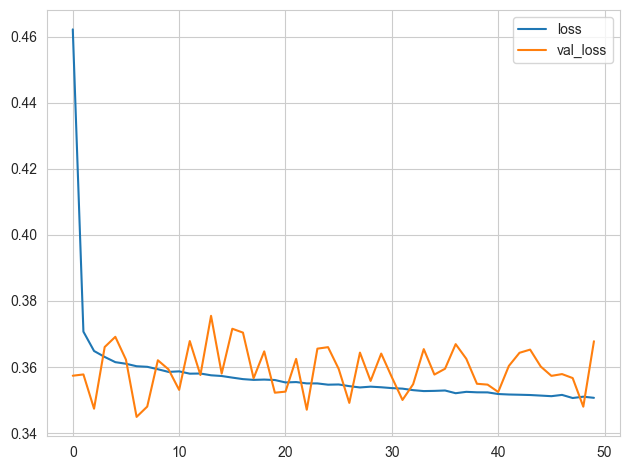

In [263]:
weighted_model_loss = pd.DataFrame(weighted_model.history.history)
weighted_model_loss.plot()
plt.tight_layout()

The validation loss could be a little less oscillatory, but at least it looks bounded and so we are not in huge danger of having overfit.

Let's look at the classification report and confusion matrix before tuning the decision threshold.

In [264]:
raw_weighted_predictions = weighted_model.predict(X_test)
weighted_predictions = np.where(raw_weighted_predictions>0.5, 1, 0)

print('Classification Report 3: \n', classification_report(y_test, weighted_predictions))
print('\n')
print('Confusion Matrix 3: \n', confusion_matrix(y_test, weighted_predictions))

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step
Classification Report 3: 
               precision    recall  f1-score   support

           0       0.47      0.83      0.60     15658
           1       0.95      0.77      0.85     63386

    accuracy                           0.78     79044
   macro avg       0.71      0.80      0.72     79044
weighted avg       0.85      0.78      0.80     79044



Confusion Matrix 3: 
 [[13013  2645]
 [14842 48544]]


This is already an improvement on the recall of the 0 category, with minimal loss to its f1-score. Let's see how threshold tuning affects it.

In [265]:
weighted_opt_thresh = ThresholdOptimizer_f1(weighted_model, X_opt, y_opt, 0.01, 0, 0.5)[0]
print(opt_thresh)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
0.67


In [266]:
weighted_predictions_opt = np.where(raw_weighted_predictions>weighted_opt_thresh, 1, 0)
print('Classification Report 4: \n', classification_report(y_test, weighted_predictions_opt))
print('\n')
print('Confusion Matrix 4: \n', confusion_matrix(y_test, weighted_predictions_opt))

Classification Report 4: 
               precision    recall  f1-score   support

           0       0.74      0.58      0.65     15658
           1       0.90      0.95      0.93     63386

    accuracy                           0.88     79044
   macro avg       0.82      0.76      0.79     79044
weighted avg       0.87      0.88      0.87     79044



Confusion Matrix 4: 
 [[ 9061  6597]
 [ 3168 60218]]


This is marginally better than the unweighted, optimized-threshold scores.

____
## Making A Prediction
Let's single out a potential borrower and use some of our models to predict whether or not the lendger should give them a loan.

In [268]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.0
term                     60
int_rate              18.24
installment          638.11
annual_inc          61665.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1996
Name: 305323, Length: 78, dtype: object

In [283]:
# Unweighted, unoptimized
print('Probability (unweighted): ', model.predict(scaler.transform(X[random_ind].reshape(1,-1))))
print('\n')
print('Prediction (unweighted/unoptimized): ', np.where(model.predict(scaler.transform(X[random_ind].reshape(1,-1)))>0.5, 1, 0))
print('\n')

#Unweighted, optimized
print('Probability (unweighted): ', model.predict(scaler.transform(X[random_ind].reshape(1,-1))))
print('\n')
print('Prediction (unweighted/optimized): ', np.where(model.predict(scaler.transform(X[random_ind].reshape(1,-1)))>opt_thresh, 1, 0))
print('\n')

#Weighted, unoptimized
print('Probability (weighted): ', weighted_model.predict(scaler.transform(X[random_ind].reshape(1,-1))))
print('\n')
print('Prediction (weighted/unoptimized): ', np.where(weighted_model.predict(scaler.transform(X[random_ind].reshape(1,-1)))>0.5, 1, 0))
print('\n')

#Weighted, optimized
print('Probability (weighted): ', weighted_model.predict(scaler.transform(X[random_ind].reshape(1,-1))))
print('\n')
print('Prediction (weighted/optimized): ', np.where(weighted_model.predict(scaler.transform(X[random_ind].reshape(1,-1)))>weighted_opt_thresh, 1, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Probability (unweighted):  [[0.6116052]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction (unweighted/unoptimized):  [[1]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Probability (unweighted):  [[0.6116052]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction (unweighted/optimized):  [[0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Probability (weighted):  [[0.24059984]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction (weighted/unoptimized):  [[0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Probability (weighted):  [[0.24059984]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction (weighted/optimized):  [[0]]


3 out of our 4 predictions indicate that this person probably won't pay off their loan. We can check whether this person did from the data set:

In [282]:
y[random_ind]

np.int64(1)

Looks like 3 out of the 4 predictions were wrong! That would be pretty disappointing for this one person.

There are many ways to evaluate the value/success of a model, and ultimately there are certain factors that should be prioritized based on the context. As we discussed earlier, a 1 lender who is 100% risk averse would probably rather never give out a loan that never gets paid back than to be more liberal about it.